<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Support Vector Machine in Mushroom dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# import the dataset for building the svm model
mush= pd.read_csv("/content/mushroom.csv")
mush.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
# info the dataset
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
mush.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
# Checking the null values
mush.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
pd.DataFrame(mush)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
# Checking the data shape
mush.shape

(2000, 26)

In [ ]:
# drop the unnamede columns
mush=mush.drop('Unnamed: 0', axis=1)

In [ ]:
# Checking the data shape
mush.shape

(2000, 25)

# Visualization

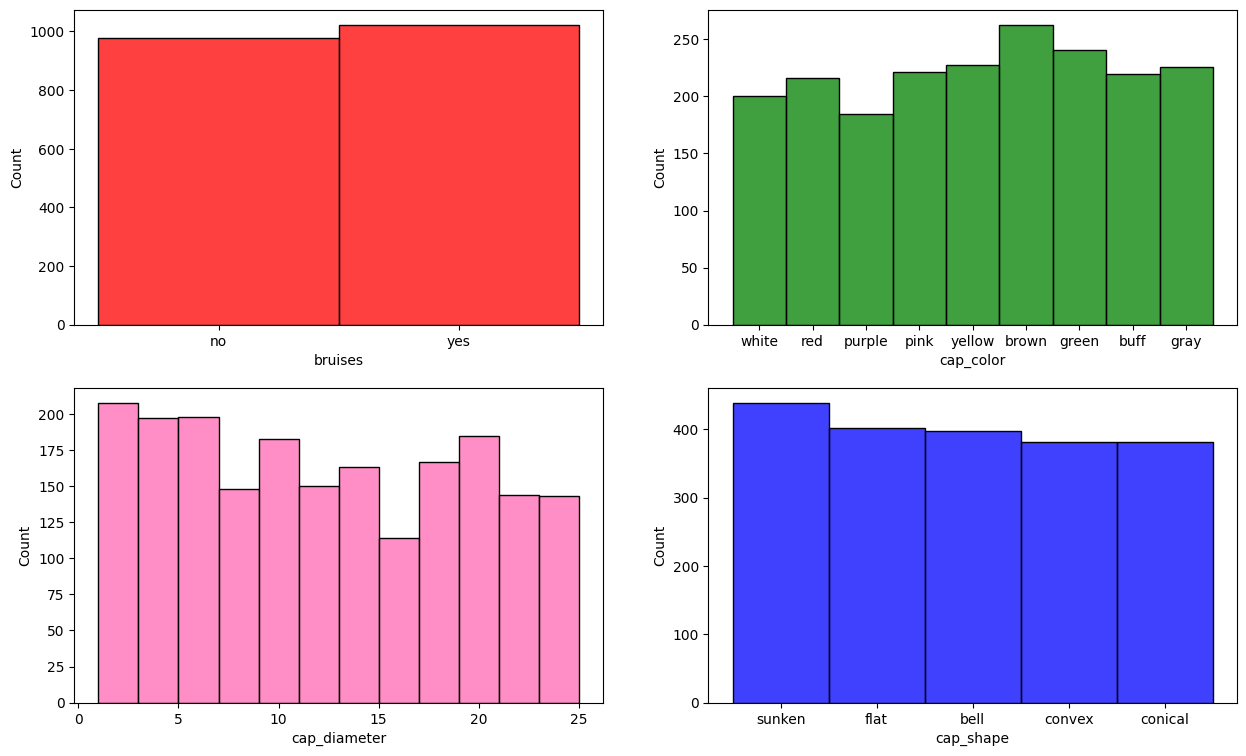

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['bruises'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['cap_color'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['cap_diameter'],color='hotpink')
plt.subplot(2,2,4)
sns.histplot(mush['cap_shape'],color='blue')
plt.show()

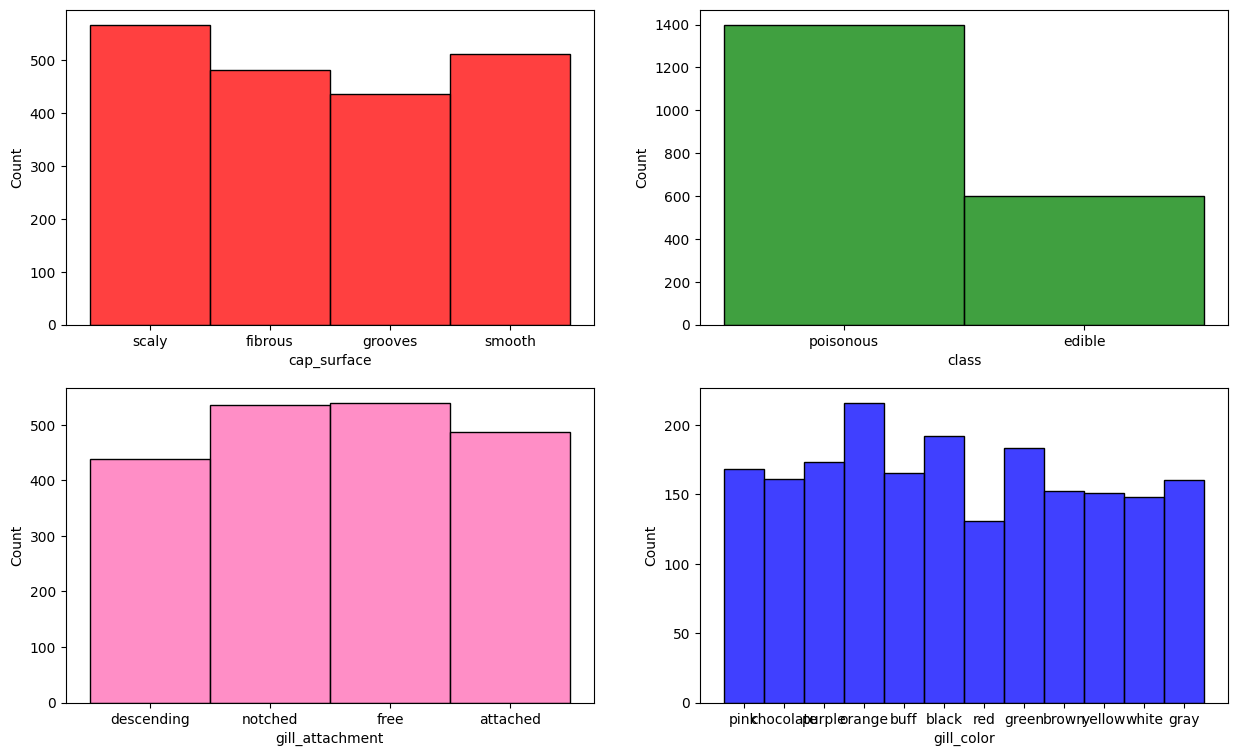

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['cap_surface'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['class'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['gill_attachment'],color='hotpink')
plt.subplot(2,2,4)
sns.histplot(mush['gill_color'],color='blue')
plt.show()

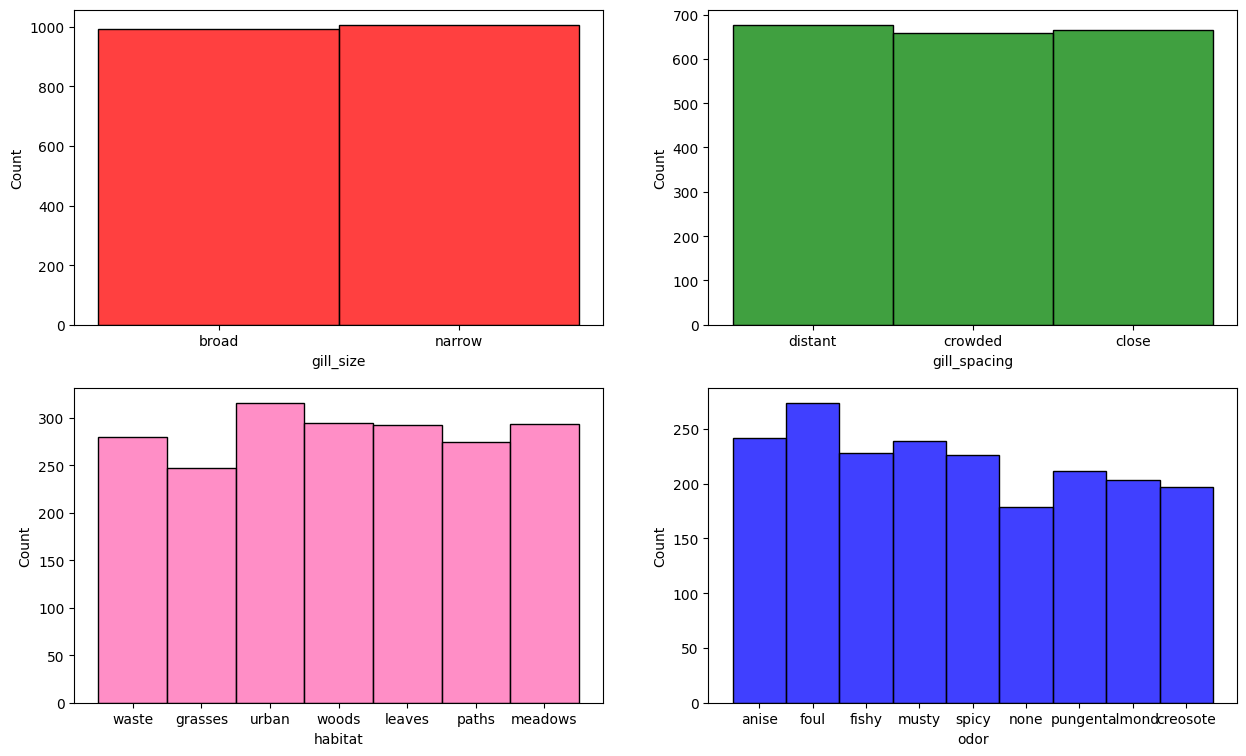

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['gill_size'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['gill_spacing'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['habitat'],color='hotpink')
plt.subplot(2,2,4)
sns.histplot(mush['odor'],color='blue')
plt.show()

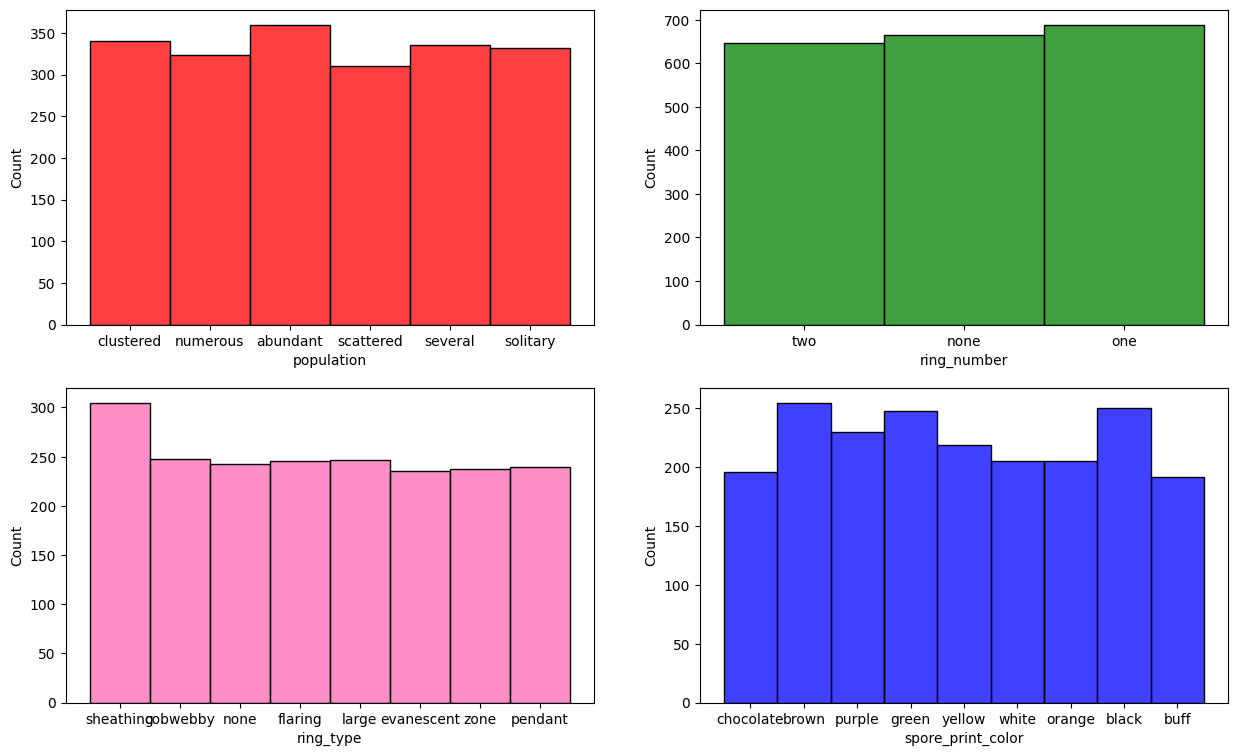

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['population'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['ring_number'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['ring_type'],color='hotpink')
plt.subplot(2,2,4)
sns.histplot(mush['spore_print_color'],color='blue')
plt.show()

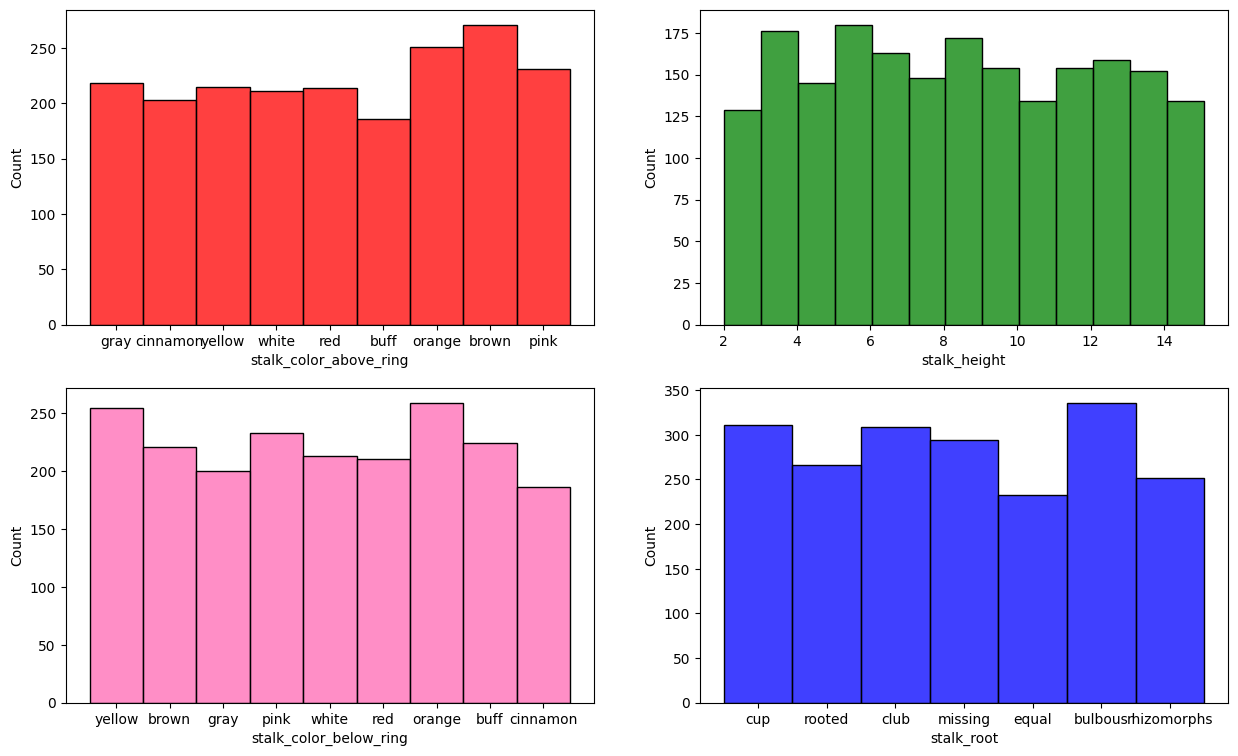

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['stalk_color_above_ring'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['stalk_height'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['stalk_color_below_ring'],color='hotpink')
plt.subplot(2,2,4)
sns.histplot(mush['stalk_root'],color='blue')
plt.show()

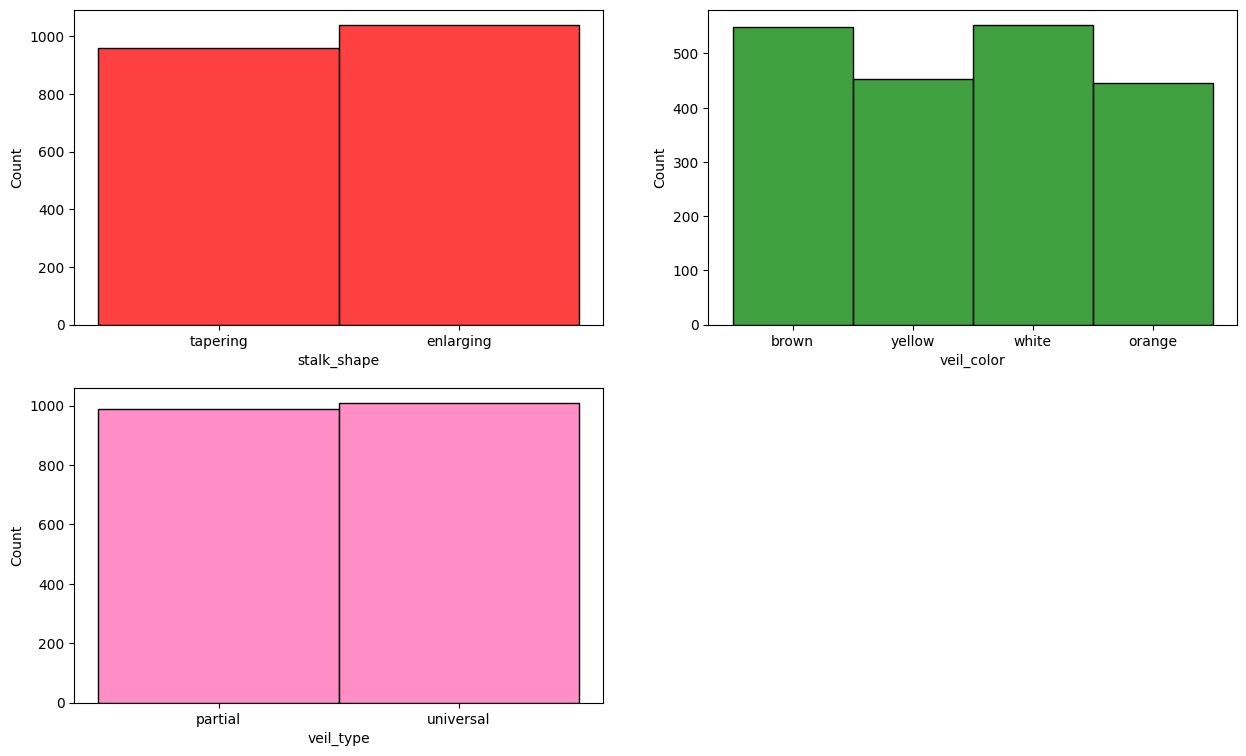

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.histplot(mush['stalk_shape'] ,color='red')
plt.subplot(2,2,2)
sns.histplot(mush['veil_color'],color='green')
plt.subplot(2,2,3)
sns.histplot(mush['veil_type'],color='hotpink')
plt.show()

# Distribution plot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

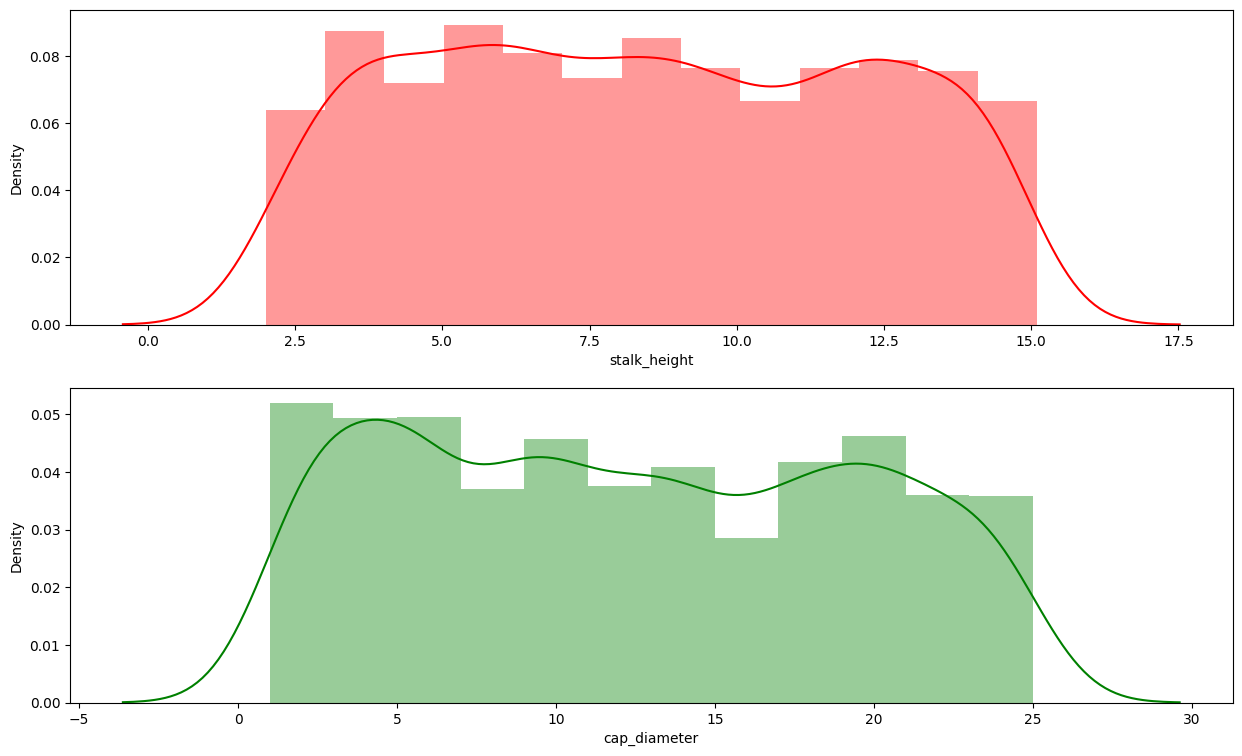

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
sns.distplot(mush['stalk_height'] ,color='red')
plt.subplot(2,1,2)
sns.distplot(mush['cap_diameter'], color='green')
plt.show()

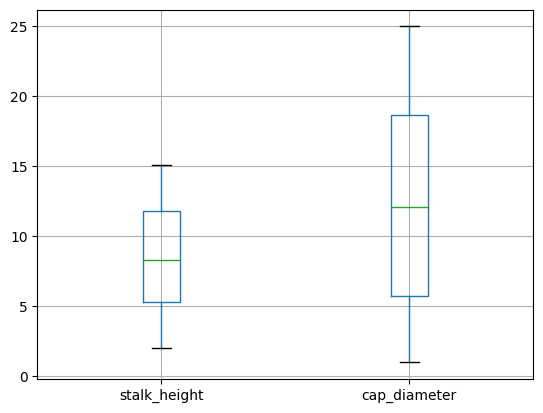

In [ ]:
mush.boxplot()
plt.show()

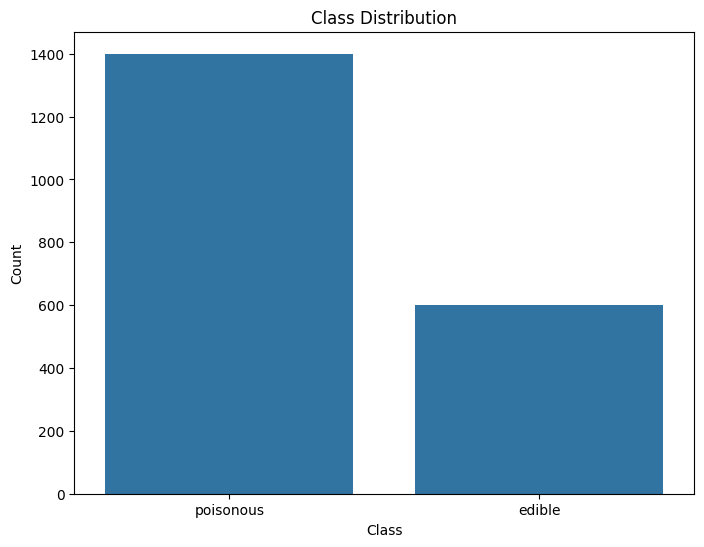

In [ ]:
# Visualize class distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=mush, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# We need to convert all the catogorial to dummy variable by using the label encoder

In [ ]:
label_encoders = {}
for column in mush.columns:
    label_encoders[column] = LabelEncoder()
    mush[column] = label_encoders[column].fit_transform(mush[column])

## Split the data into training and testing sets

In [ ]:
# Split the dataset into training and testing sets
X = mush.drop('class', axis=1)
y = mush['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1600, 24)

In [ ]:
X_test.shape

(400, 24)

# Support vector machine model implementation



Keranal = linear

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nModel Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Model Performance:
Accuracy: 66.75
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925
Confusion Matrix:
[[  0 133]
 [  0 267]]


## We try to use the different methods

In [ ]:
# poly method
clf = SVC(kernel= "poly")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 66.75


array([[  0, 133],
       [  0, 267]])

In [ ]:
# Gaussian method
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 88.5


array([[ 87,  46],
       [  0, 267]])

## Here we can see that the gaussian kernel method is having the better accuracy (88.5) it's better accuracy than other kernel methods

### Support Vector Machines (SVMs) are versatile machine learning algorithms with numerous real-life applications across various domains:

Classification: SVMs are widely used for classification tasks such as text categorization (spam detection, sentiment analysis), image classification (face detection, object recognition), and bioinformatics (protein classification, gene classification).

Regression: SVMs can be applied to regression problems, where the goal is to predict continuous outcomes. For instance, SVM regression can be used in financial forecasting, such as predicting stock prices or housing prices.

Image Recognition: SVMs are commonly used in image recognition tasks, such as handwritten digit recognition, facial expression recognition, and medical image analysis (tumor detection in MRI scans).

Text and Document Analysis: SVMs are utilized in tasks like text categorization, sentiment analysis, and document classification. They are used by search engines to categorize web pages and by recommendation systems to classify user preferences based on textual data.

Computer Vision: SVMs are employed in various computer vision tasks such as object detection, gesture recognition, and human action recognition in videos.

Financial Forecasting: SVMs are used in financial applications for tasks like credit scoring, predicting bankruptcy, and forecasting stock market trends.

Medical Diagnosis: SVMs assist in medical diagnosis by analyzing patient data to predict diseases or conditions, such as cancer diagnosis based on medical imaging or patient records.

These are just a few examples showcasing the versatility and applicability of SVMs in solving a wide range of real-world problems across various domains.